In [3]:
pip install langchain_community

Defaulting to user installation because normal site-packages is not writeable
  Using cached langchain_community-0.3.22-py3-none-any.whl.metadata (2.4 kB)
  Using cached langchain-0.3.24-py3-none-any.whl.metadata (7.8 kB)
  Using cached dataclasses_json-0.6.7-py3-none-any.whl.metadata (25 kB)
  Using cached pydantic_settings-2.9.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached httpx_sse-0.4.0-py3-none-any.whl.metadata (9.0 kB)
  Using cached marshmallow-3.26.1-py3-none-any.whl.metadata (7.3 kB)
  Using cached typing_inspect-0.9.0-py3-none-any.whl.metadata (1.5 kB)
  Using cached langchain_text_splitters-0.3.8-py3-none-any.whl.metadata (1.9 kB)
  Using cached typing_inspection-0.4.0-py3-none-any.whl.metadata (2.6 kB)
  Using cached typing_extensions-4.13.2-py3-none-any.whl.metadata (3.0 kB)
Using cached langchain_community-0.3.22-py3-none-any.whl (2.5 MB)
Using cached dataclasses_json-0.6.7-py3-none-any.whl (28 kB)
Using cached httpx_sse-0.4.0-py3-none-any.whl (7.8 kB)
Using cached l

In [5]:
pip install pydantic langchain langgraph langchain-core langchain-community python-dotenv langchain-groq arxiv wikipedia

Defaulting to user installation because normal site-packages is not writeable
  Using cached wikipedia-1.4.0-py3-none-any.whl
  Using cached groq-0.23.1-py3-none-any.whl.metadata (15 kB)
  Using cached feedparser-6.0.11-py3-none-any.whl.metadata (2.4 kB)
  Using cached sgmllib3k-1.0.0-py3-none-any.whl
Using cached feedparser-6.0.11-py3-none-any.whl (81 kB)
Using cached groq-0.23.1-py3-none-any.whl (127 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper, ArxivAPIWrapper


# Creating a Tools

In [7]:
api_wrapper_arxiv = ArxivAPIWrapper(top_k_results=2, doc_content_chars_max=500)
arxiv = ArxivQueryRun(api_wrapper=api_wrapper_arxiv, description="Search for papers on arXiv.org")
print(arxiv.name)

arxiv


In [8]:
arxiv.invoke("attention is all you need")

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with low latencies remains challenging due to the quadratic input length\ncomplexity of the attention layers. In this work, we investigate the effect of\ndropping MLP and attention layers at inference time o"

In [9]:
api_wrapper_wiki = WikipediaAPIWrapper(top_k_results=2, doc_content_chars_max=500)
wiki = WikipediaQueryRun(api_wrapper=api_wrapper_wiki, description="Search for articles on Wikipedia")
wiki.name

'wikipedia'

In [10]:
wiki.invoke("attention is all you need")

'Page: Attention Is All You Need\nSummary: "Attention Is All You Need" is a 2017 landmark research paper in machine learning authored by eight scientists working at Google. The paper introduced a new deep learning architecture known as the transformer, based on the attention mechanism proposed in 2014 by Bahdanau et al. It is considered a foundational paper in modern artificial intelligence, and a main contributor to the AI boom, as the transformer approach has become the main architecture of a wi'

# Integrate this

In [11]:
from dotenv import load_dotenv
load_dotenv()

import os

os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [12]:
### Tavily Search Tool
from langchain_community.tools.tavily_search import TavilySearchResults

tavily = TavilySearchResults()

In [13]:
tavily.invoke("Provide me the recent AI news?")

[{'title': 'Artificial intelligence - NBC News',
  'url': 'https://www.nbcnews.com/artificial-intelligence',
  'content': "03:36\n\nAI startup DeepSeek causes buzz in China but draws global scrutiny over censorship and security\n\nNBC News NOW\n\n02:03\n\nA.I. leaders say China may have copied U.S. technology\n\nNightly News\n\n08:23\n\nNew Chinese A.I. tool 'DeepSeek' competes with American models\n\nNBC News NOW\n\n01:09\n\nChinese A.I. app shakes up Silicon Valley, causing Wall Street selloff\n\nNightly News\n\nMORE AI NEWS\n\nElon Musk's AI startup acquires X in deal that values social media platform at $33 billion [...] Nightly News\n\n02:20\n\nCollege students warn of privacy risks from smart glasses\n\nNightly News\n\n03:15\n\nHarvard professor uses AI to replicate himself for tutor experiment\n\nNBC News NOW\n\n02:35\n\nMan files complaint after ChatGPT falsely claimed he murdered his children\n\nNBC News NOW\n\n02:54\n\nA.I. chatbots becoming popular but worry privacy advocate

In [14]:
## combine all these tools in the list
tools=[arxiv, wiki, tavily]

## Initialize the LLM Model
from langchain_groq import ChatGroq

llm=ChatGroq(model="qwen-qwq-32b")

llm.invoke("What is AI")


llm_with_tools=llm.bind_tools(tools=tools)

## Execute this call
llm_with_tools.invoke("What is the recent news on AI?")



## Execute this call
llm_with_tools.invoke("What is the latest research on quantum computing?")


## Execute this call
llm_with_tools.invoke("What is machine learning?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_yymq', 'function': {'arguments': '{"query": "machine learning"}', 'name': 'wikipedia'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 157, 'prompt_tokens': 326, 'total_tokens': 483, 'completion_time': 0.381353319, 'prompt_time': 0.020283099, 'queue_time': 0.25817431199999996, 'total_time': 0.401636418}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_3796682456', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-8c87d621-fdfb-4acc-8fd7-e47d5568ae36-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': 'machine learning'}, 'id': 'call_yymq', 'type': 'tool_call'}], usage_metadata={'input_tokens': 326, 'output_tokens': 157, 'total_tokens': 483})

# Work-Flow

In [15]:
## State Schema
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage ## Human message or AI message
from typing import Annotated  ## labelling
from langgraph.graph.message import add_messages  ## Reducers in Langgraph

In [16]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

In [17]:
### Entire Chatbot With LangGraph
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

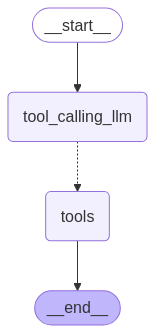

In [18]:
### Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

## Edgess
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", END)

graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [19]:
messages=graph.invoke({"messages":"1706.03762"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  arxiv (call_zzx8)
 Call ID: call_zzx8
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks in an encoder-decoder configuration. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer, base


In [20]:
messages=graph.invoke({"messages":"Hi My name is Krish"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Hi My name is Krish
================================== Ai Message ==================================

Hello Krish! Nice to meet you. How can I assist you today?


In [21]:
messages=graph.invoke({"messages":"What is the recent AI news and then please tell me the recent research paper on quantum computing?"})
for m in messages['messages']:
    m.pretty_print() 

================================ Human Message =================================

What is the recent AI news and then please tell me the recent research paper on quantum computing?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_9q0x)
 Call ID: call_9q0x
  Args:
    query: recent AI news
  arxiv (call_ttaa)
 Call ID: call_ttaa
  Args:
    query: recent quantum computing research
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "The latest AI news we announced in March - Google Blog", "url": "https://blog.google/technology/ai/google-ai-updates-march-2025/", "content": "The latest AI news we announced in March\n\nApr 04, 2025\n\n[[read-time]] min read\n\nHere’s a recap of some of our biggest AI updates from March, including Gemini 2.5 Pro, expanded access to AI Overviews, the release of AI Mode and more.\n\nGeneral summary [...] Marc

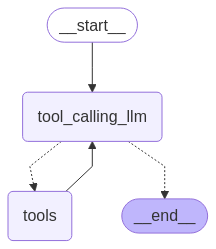

================================ Human Message =================================

What is the recent AI news and then please tell me the recent research paper on quantum computing?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_ptr9)
 Call ID: call_ptr9
  Args:
    query: recent AI news
  arxiv (call_tgyx)
 Call ID: call_tgyx
  Args:
    query: quantum computing
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "The latest AI news we announced in March - Google Blog", "url": "https://blog.google/technology/ai/google-ai-updates-march-2025/", "content": "The latest AI news we announced in March\n\nApr 04, 2025\n\n[[read-time]] min read\n\nHere’s a recap of some of our biggest AI updates from March, including Gemini 2.5 Pro, expanded access to AI Overviews, the release of AI Mode and more.\n\nGeneral summary [...] March was all about 

In [22]:
### Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

## Edgess
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", "tool_calling_llm")

graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

messages=graph.invoke({"messages":"What is the recent AI news and then please tell me the recent research paper on quantum computing?"})
for m in messages['messages']:
    m.pretty_print()